This notebook will run a python script to exctract the metadata encoded in the model pickle files in the output of AlphaFold2. This data contains information such as sequence depth coverage, pLDDT scores, and aligned error scores. All of these data points can be used to assess the confidence of our model, and even aid in chosing key residues or domains for experimental design.

If you would like to understand more about AlphaFold2's output and the pickle file format, please see the following paper, links, and the Python webpage on the pickle file format.

Original Paper:
https://www.nature.com/articles/s41586-021-03819-2

Gihub Page:
https://github.com/deepmind/alphafold

Python Pickel Format:
https://docs.python.org/3/library/pickle.html

-Devon J. Boland

In [ ]:
# Run this line to mount your Google Drive Storage, so we can acess the files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


When you run the next line, it will ask for the directory of your AF2 output on Google Drive.

To find this follow these instructions:

1) Click the folder button on the left tab.
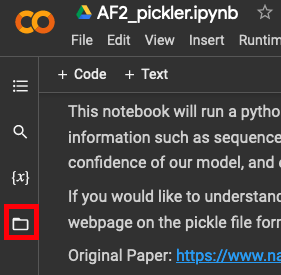

2) After we mounted our Drive storage, we need to navigate the folder. It is under content:
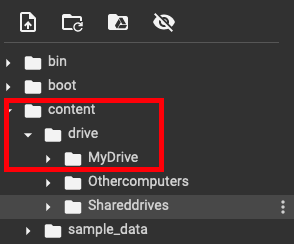
3) You must find the output folder from AF2. Make sure you navigate all the way to the output folder with the pckl and json files:
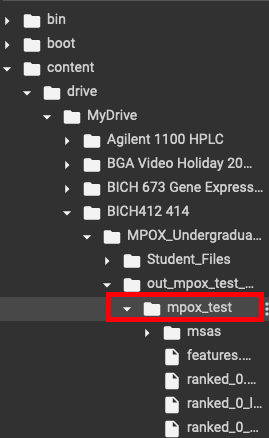
4) Finally right click on the file named "features.pkl" and select "copy path". Then run the next block of code and past the path in the block that pops up.

In [ ]:
# Ask user for directory location and store in valuable
feature_file = input("Path to AF2 Output Features.pckl File?")
print(feature_file)

Path to AF2 Output Features.pckl File?/content/drive/MyDrive/BICH412 414/MPOX_Undergraduate_Project/Student_Files/Chapa, Emily/features.pkl
/content/drive/MyDrive/BICH412 414/MPOX_Undergraduate_Project/Student_Files/Chapa, Emily/features.pkl


In [ ]:
# Import modules
import os
import os.path
import glob
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

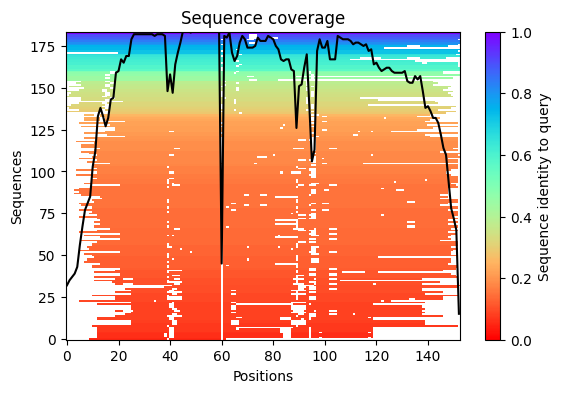

In [ ]:
feature_dict = pickle.load(open(feature_file,'rb'))


def generate_output_images(feature_dict):
    msa = feature_dict['msa']
    seqid = (np.array(msa[0] == msa).mean(-1))
    seqid_sort = seqid.argsort()
    non_gaps = (msa != 21).astype(float)
    non_gaps[non_gaps == 0] = np.nan
    final = non_gaps[seqid_sort] * seqid[seqid_sort, None]



    ###################### PLOT MSA WITH COVERAGE ####################

    plt.figure(figsize=(14, 4), dpi=100)
    plt.subplot(1, 2, 1)
    plt.title("Sequence coverage")
    plt.imshow(final,
               interpolation='nearest', aspect='auto',
               cmap="rainbow_r", vmin=0, vmax=1, origin='lower')
    plt.plot((msa != 21).sum(0), color='black')
    plt.xlim(-0.5, msa.shape[1] - 0.5)
    plt.ylim(-0.5, msa.shape[0] - 0.5)
    plt.colorbar(label="Sequence identity to query", )
    plt.xlabel("Residue Index")
    plt.ylabel("Sequences")
    path = os.path.dirname(feature_file)
    plt.savefig(path+"/MSA Coverage Plot", dpi=600)

    ##################################################################

generate_output_images(feature_dict)
